In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df1= pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
#count of samples in each datatypes using aggregate
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#drop the features which is less important while deciding the prices using df1.drop 
df2=df1.drop(['area_type','availability','society','balcony'], axis='columns')

df2.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
#data cleaning
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# either we can fill the missing values with median value or we can drop those value but here there are many values available wrt the 73 values so we cn drop that

In [8]:
df3=df2.dropna()

In [9]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
#here we see there is BHK as well as Bedroom label so we have to choose only one name. so first we have to find the variety using unique function

In [11]:
df3 ['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-12-919015e02510>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3['bhk'].unique()


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
#here we see there are only numerical values and no bhk or bedroom now we have check for outliers or errors we see 43 and 20 bhk which has to be error

In [16]:
#now we will check for the square fit and check is there are any abnormality
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

we will check if the values present in total_sqft are all single values like float or they are range of values. to do that we use try and except. we define a function and then we try to convert each values to float if there is a range that is not a float so it will be thrown to except block and if we use negete'~' then we get the total no. of values with the ranges instead of the floats

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
#apply the function defines in the data frame
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
#we can see the data is not uniform . the units are different there are outliers , these can be solved by data cleaning process. that is the most time consuming and has to be done very carefully


In [20]:
#a fuction just totake only the range values and returns the avg value
def convert(x):
    tokens=x.split('-')                       #split the string using .split
    if len(tokens)==2:                        #if the tokens are 2
        return (float(tokens[0])+float(tokens[1]))/2 #we convert them to float and take average
    try:
        return float(x)
    except:
        return None

In [21]:
df4= df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [22]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

till now we have removed unneccesary features, cleaned up totat sqft and bhk columns and took care of the Null Vlaues

In [23]:
#feature engineering and dimensionality reduction

In [24]:
df5=df4.copy()
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
#we need to find now price per sq_ft, we are creating a new column in feature engineering

In [26]:
df5['price_per_sqft']= df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


location is a categorical feature. so we have to take care of that if there are too many present categorical values it might cuase a problem. so to chekc the no. of location we use .unique fucn

In [27]:
df5['location'].unique()


array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [28]:
len(df5['location'].unique()) #there are 1304 locations thats huge no of values. this might cause a dimensionlaity problem

1304

#many a time in 1304 locations we will find out that there are certain places with just 1 or 2 data points we can ignore those values to reduce the data value 

In [29]:
df5.location= df5.location. apply(lambda x: x.strip()) #strpping any space between the texts to make the data look cleaner
loc_stats = df5.groupby('location')['location'].agg('count')
loc_stats 

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

#we can sort them for better understanding using sort_values() function
loc_stats . sort_values(ascending=False)

In [30]:
len(loc_stats[loc_stats<=10]) #to check how many locations has less than or equal to 10 data points

1052

In [31]:
loc_stats_10 = loc_stats[loc_stats<=10]
loc_stats_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [32]:
df5.location=df5.location.apply(lambda x: 'other' if x in loc_stats_10 else x) 
#we put all the values with less than 10 datapoints to a 'other' series to reduce its dimensions
len(df5['location'].unique()) #we see the reduced number of unique location due to others category

242

this will be benifical during one hot encoding as 242 values will be present instead of 1306 so that will be easier. this is dimension reduction

In [33]:
df5.head(45)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.00,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.00,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.00,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.00,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.00,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.00,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.00,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.00,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.00,6.0,370.00,6,36274.509804


#we can see some locations are put into other category in the data frame
#we will now remove the outliers. using domain knowledge we can say 1bhk can be around 300sq ft. so 2 bhk 600sq ft. in the same waywe will have to check for the errors where there present are abnormal values

In [34]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


we cannot keep these data points where there are 8 bedrooms n 600 sqft these are just abnormalities so we need to remove them. these data points are called outliers which gives abnormal values

In [35]:
df5.shape

(13246, 7)

In [36]:
df6= df5[~(df5.total_sqft/df5.bhk<300)] #we used negetae because we wanted to avoide those values which were outliers
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [37]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

here we see the minimum price is 267 which is unlikely whereas the maximum price vakue is 17000 which is also not normal. so they ar outliers too if not removed they can harm our model.

In [38]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        stdev=np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft <=(m+stdev)) & (subdf.price_per_sqft >(m-stdev))]
        df_out= pd.concat([df_out,reduced_df])
    return df_out

In [39]:
df7=remove_outliers(df6)
df7.shape

(10241, 7)

now we have look for outliers in prices. for eg there are certain values or areas for which there is anomaly in prices we need to remove that

In [40]:
def scatter_plotting(df, location):
    bhk2= df[(df.location==location) & (df.bhk==2)]
    bhk3= df[(df.location==location) & (df.bhk==3)]

    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue', label='bhk2',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft, marker='*',color='green', label= 'bhk3', s=50)
    plt.xlabel("total sqare feet area")
    plt.ylabel("price per square feet")
    plt.legend()
    plt.title(location)
    plt.show()

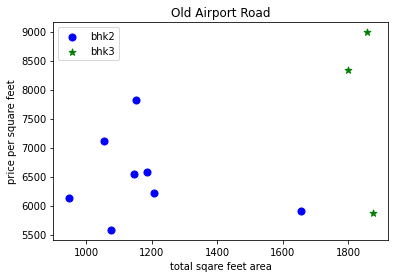

In [41]:
scatter_plotting(df7,'Old Airport Road')

we have to make the prices right for each bhk, there are certain values where we see the 2bhk costs more than 3 bhk in the same location. These can cause error to our model so we have to change them. We can create a dictionary which has same locations and then we can rearrenge the prices for 1 2, 3  bhks in that locations

In [42]:
def remove_outliers(df):
    excluding = np.array([])                               #creating an array for the excluding datapoints
    for location, location_df in df.groupby('location'):   #checking locations
        bhk_stats={}                                       #creating an dictionary for bhk stats  
        for bhk, bhk_df in location_df.groupby('bhk'):     #inside bhk dataframe we are grouping the locations and finding out no. of bhk for same locations
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),  #inside the bhk dictionary we are calculating mean, standard dev and count for 1 2 3 4etc. bhks in same locations
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }                                              #we are doing this to compare prices for the bhks in a same  locations to understand if there is price abnormality
        for bhk,bhk_df in location_df.groupby('bhk'):  
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                excluding= np.append(excluding,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values) #comparing the  mean values
    return df.drop(excluding, axis='index') #we are excluding the datapoints whose price per sqft is less than the previous bhk mean price

So what we did is that we are calculating mean for 1 bhk and then comapringit with ohter bhk and if the value of a 2bhk or 3 bhk goes less than 1 bhk mean price we are excluding that data point it is a form of data cleaning

In [43]:
df8= remove_outliers(df7)
df8.shape

(7329, 7)

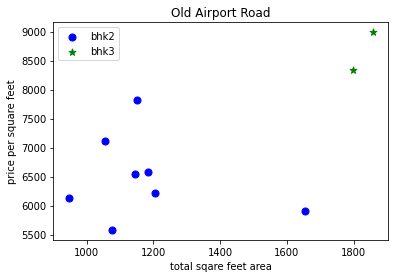

In [44]:
scatter_plotting(df8,'Old Airport Road')

we can see some points have disappered those were the anomaly points. they had 3 bhk values less than 2. Those data points are removed

Text(0, 0.5, 'count')

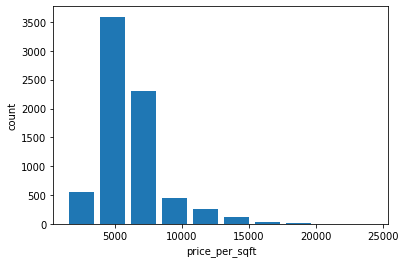

In [45]:
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

 there are majority of distribution between 0 to 10000 sqft.

Now after we checked these features the next feature is the bathroom. first we see how many unique values of bathroom are present by using .unique()

In [46]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

we can see there are 13 bathrooms even 16 so these are quite unusal maybe we could remove them but first we will check the area or bhk and we will comapre it relativly

In [47]:
df8


,location,size,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
13238,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
13245,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
13285,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
13291,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [48]:
df8[df8.bath<10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
13238,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
13245,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
13285,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
13291,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


We can see majority of the bath having 12 or 13 bathrooms are of 10 or 11 bhk houses now that may be usual but having +2 bathrooms is just not riight so we will consider them as outliers

Text(0, 0.5, 'count')

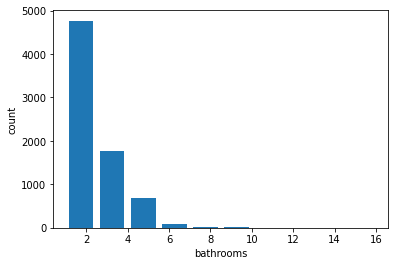

In [49]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('bathrooms')
plt.ylabel('count')

In [50]:
df9 = df8[df8.bath<df8.bhk+2] #If the no. of bath is greater than +2 bhk then we consider them outliers and remove them

In [51]:
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
13238,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
13245,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
13285,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
13291,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [52]:

df10=df9.drop('size', axis='columns')
df10 .shape

(7251, 6)

In [53]:
df10.drop('price_per_sqft', axis='columns')

,location,total_sqft,bath,price,bhk
210,1st Block Jayanagar,2850.0,4.0,428.0,4
848,1st Block Jayanagar,1630.0,3.0,194.0,3
2152,1st Block Jayanagar,1875.0,2.0,235.0,3
7138,1st Block Jayanagar,1200.0,2.0,130.0,3
7358,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
13238,other,1200.0,2.0,70.0,2
13245,other,1800.0,1.0,200.0,1
13285,other,1353.0,2.0,110.0,2
13291,other,812.0,1.0,26.0,1


now our data frame is ready for model building. we have cleaned unneccessary datapoints, we have removed abmormal values, we have dropped features that were not important and we have removed the outliers

machine learning cannot process categorical data or strings so we need to convert locations to numerical value. One hot Encodingis the best way

In [54]:
 ohencoded= pd.get_dummies(df10.location)
 #we made a dataframe of dummy varieables for each locations they are now one hot encoded and machine learning model 
 #can easily read them

In [55]:
df11= pd.concat([df10,ohencoded.drop('other', axis='columns')],axis='columns') 
#not to get trapped in dummies we take one column less than the original one so we dropped the others column here

df11

,location,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,other,1200.0,2.0,70.0,2,5833.333333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13245,other,1800.0,1.0,200.0,1,11111.111111,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,other,1353.0,2.0,110.0,2,8130.081301,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13291,other,812.0,1.0,26.0,1,3201.970443,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df12=df11.drop('location', axis='columns') 
   #as we have done one hot encoding we can drop the location feature
df12
df12.shape

(7251, 246)

In [57]:
X=df12.drop('price', axis='columns') #all independent variables except the target
X

,total_sqft,bath,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,4,15017.543860,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,3,11901.840491,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3,12533.333333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,3,10833.333333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,2,11983.805668,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,1200.0,2.0,2,5833.333333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13245,1800.0,1.0,1,11111.111111,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13285,1353.0,2.0,2,8130.081301,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13291,812.0,1.0,1,3201.970443,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y=df12.price #the target variable
y.head()

210     428.0
848     194.0
2152    235.0
7138    130.0
7358    148.0
Name: price, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state =42)

In [63]:
from sklearn.linear_model import LinearRegression
lr_m= LinearRegression()
lr_m.fit(X_train,y_train)
lr_m.score(X_test,y_test)

0.9085417202382201

now we can try for better scores we will apply k-fold cross validation. We will shuffle the data about a number of time to see how the score varies

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cross_val = ShuffleSplit(n_splits= 5, test_size=0.3)
cross_val_score(LinearRegression(),X,y,cv=cross_val)

array([0.92509753, 0.8748628 , 0.94168621, 0.91203721, 0.93983291])

we can see there are certain shuffling for which we are getting upto 94%accuracy this states that our model is a decent one


In [82]:
def predict_price (location,total_sqft,bath,bhk):
    index= np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))   
    x[0]=total_sqft
    x[1]=bath
    x[2]=bhk
    if index>=0:
        x[index]=1
        
    price_predicted=lr_m.predict([x])[0]
    if(price_predicted>=0):
        return price_predicted
    else:
        return 'Sorry! Not Avilable'

making a zero array for all the columns and then assiging 0,1,2 to total_sqft,batha nd bhk.index will give the value of the location we trying to find for example '1st Block Jayanagar' is 3. now as 3>0 so x[3]=1. so among all the zeros in the columns the '1st Block Jayanagar' will become 1 and hence the prediction will be given for the location whose value is 1

In [83]:
#trying out prediction
predict_price('Electronic City Phase II',3000,2,3)

132.8103008066415

In [84]:
predict_price('Uttarahalli',100,3,3)

'Sorry! Not Avilable'

In [85]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [88]:
import pickle
with open('The Home Price Prediction.pickle','wb') as f:
    pickle .dump(lr_m,f)

In [90]:
import json
columnss={
    'data_columns' :[col.lower() for col in X.columns]
}
with open("column.json",'w') as f:
    f.write(json.dumps(columnss))